# Data Loading and Gain Info

### Import Modules

In [1]:
import pandas as pd

### Load Data

In [2]:
# Load the credits dataset
credits_df = pd.read_csv('Data/tmdb_5000_credits.csv')
# credits_df = credits_df.astype(str)
# Load the movies dataset
movies_df = pd.read_csv('Data/tmdb_5000_movies.csv')
# movies_df = movies_df.astype(str)

### Gain Info

#### Display basic information about the credits dataset

In [3]:
print("Credits Dataset Info:")
credits_df.info()

Credits Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


#### Display basic information about the movies dataset

In [4]:
print("\nMovies Dataset Info:")
movies_df.info()


Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15 

#### Merge datasets on the 'movie_id' column

In [5]:
merged_df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id', how='inner')
merged_df.drop('id', axis=1, inplace=True)
merged_df.drop('title_y', axis=1, inplace=True)
merged_df.rename(columns={'title_x': 'title'}, inplace=True)

#### Display describtion about the merged dataset

In [6]:
print("\nNumerical Description:\n")
merged_df.describe().T


Numerical Description:



,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04
movie_id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05


In [7]:
print("\nCategorical Description:\n")
merged_df.describe(include='object').T


Categorical Description:



,count,unique,top,freq
genres,4803,1175,"[{""id"": 18, ""name"": ""Drama""}]",370
homepage,1712,1691,http://www.missionimpossible.com/,4
keywords,4803,4222,[],412
original_language,4803,37,en,4505
original_title,4803,4801,Out of the Blue,2
overview,4800,4800,"In the 22nd century, a paraplegic Marine is di...",1
production_companies,4803,3697,[],351
production_countries,4803,469,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2977
release_date,4802,3280,2006-01-01,10
spoken_languages,4803,544,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",3171


# Data Cleaning

#### Clean the merged dataset

In [8]:
clean_df = merged_df.copy()
clean_df.drop('homepage', axis=1, inplace=True)
clean_df.drop('tagline', axis=1, inplace=True)
clean_df.describe().T
clean_df.dropna(inplace=True)
# clean_df = clean_df[(clean_df != '[]').all(axis=1)]
clean_df = clean_df[(clean_df[['genres', 'cast', 'crew']] != '[]').all(axis=1)]
clean_df = clean_df[(clean_df != 0).all(axis=1)]
clean_df = clean_df[clean_df['revenue'] > 1e5]
clean_df = clean_df[clean_df['budget'] > 1e5]
clean_df.reset_index(drop=True, inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3153 non-null   int64  
 1   genres                3153 non-null   object 
 2   keywords              3153 non-null   object 
 3   original_language     3153 non-null   object 
 4   original_title        3153 non-null   object 
 5   overview              3153 non-null   object 
 6   popularity            3153 non-null   float64
 7   production_companies  3153 non-null   object 
 8   production_countries  3153 non-null   object 
 9   release_date          3153 non-null   object 
 10  revenue               3153 non-null   int64  
 11  runtime               3153 non-null   float64
 12  spoken_languages      3153 non-null   object 
 13  status                3153 non-null   object 
 14  title                 3153 non-null   object 
 15  vote_average         

#### Define a profitable column

In [9]:
clean_df['profit'] = clean_df['revenue'] - clean_df['budget']
clean_df['profitable'] = (clean_df['profit'] > 2.5e7)
print(f"{(clean_df['profitable'] == True).sum()} of movies are profitable")
print(f"{(clean_df['profitable'] == False).sum()} of movies are not profitable")

1629 of movies are profitable
1524 of movies are not profitable


#### Save clean data as a csv file

In [10]:
clean_df.to_csv('Data/clean_data.csv')

# Exploratory Data Analysis:

### Import Modules

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gender_guesser.detector as gender_detector

### Analyze numerical columns

#### Short Description

In [13]:
numerical_df = clean_df.select_dtypes(include='number')
# numerical_df = numerical_df[(numerical_df > 0).all(axis=1)]
# numerical_df = numerical_df[numerical_df['budget'] > 1e5]
# numerical_df.reset_index(drop=True, inplace=True)
numerical_df.drop('movie_id', axis=1, inplace=True)
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,3153.0,4.152203e+07,4.454889e+07,1.140000e+05,1.200000e+07,2.700000e+07,5.500000e+07,3.800000e+08
popularity,3153.0,2.953075e+01,3.642225e+01,1.998400e-02,1.093054e+01,2.082778e+01,3.788502e+01,8.755813e+02
revenue,3153.0,1.239552e+08,1.876209e+08,1.037350e+05,1.846968e+07,5.788106e+07,1.492956e+08,2.787965e+09
runtime,3153.0,1.110558e+02,2.097501e+01,4.100000e+01,9.700000e+01,1.070000e+02,1.210000e+02,3.380000e+02
vote_average,3153.0,6.321376e+00,8.506267e-01,3.000000e+00,5.800000e+00,6.400000e+00,6.900000e+00,8.500000e+00
vote_count,3153.0,9.965490e+02,1.425139e+03,1.000000e+00,1.900000e+02,4.850000e+02,1.173000e+03,1.375200e+04
profit,3153.0,8.243322e+07,1.594802e+08,-1.657101e+08,8.000000e+05,2.852559e+07,9.933028e+07,2.550965e+09


#### Correlation

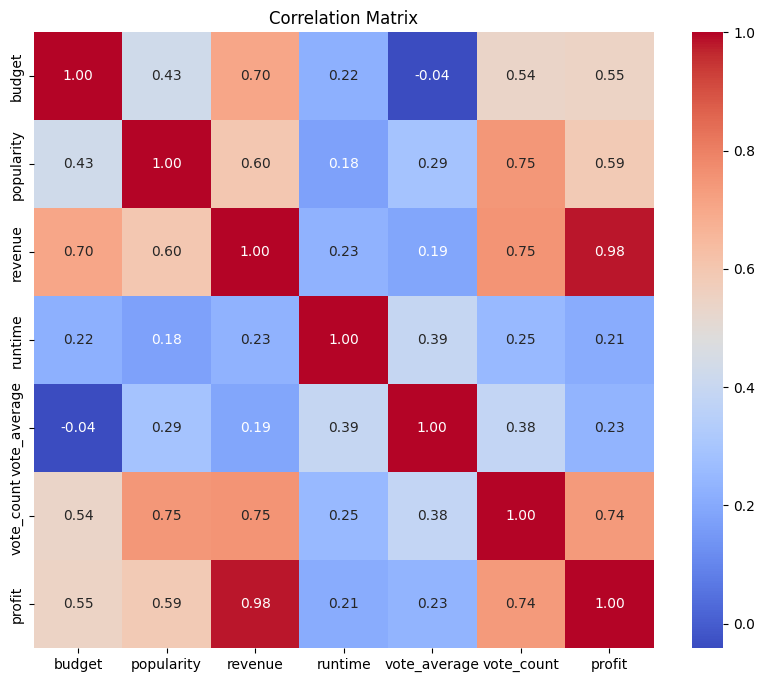

In [14]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Analyze non-numerical columns

In [15]:
non_numerical_df = clean_df.select_dtypes(include='object')
non_numerical_df.describe().T

,count,unique,top,freq
genres,3153,913,"[{""id"": 18, ""name"": ""Drama""}]",195
keywords,3153,3031,[],90
original_language,3153,26,en,3029
original_title,3153,3153,Avatar,1
overview,3153,3153,"In the 22nd century, a paraplegic Marine is di...",1
production_companies,3153,2574,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",47
production_countries,3153,313,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2107
release_date,3153,2450,2014-12-25,7
spoken_languages,3153,435,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2081
status,3153,2,Released,3152


#### Number of casts

In [16]:
class GenderPredictor:
    def __init__(self):
        self.detector = gender_detector.Detector()

    def __call__(self, first_name):
        first_name = first_name.capitalize()
        pred_gender = self.detector.get_gender(first_name)
        if "male" == pred_gender:
            gender = "male"
        elif "female" == pred_gender:
            gender = "female"
        else:
            gender = "unknown"
        return gender

class_gender = {0: "unknown", 1: "female", 2: "male"}
gender_predictor = GenderPredictor()

In [17]:
# Define a function to count the number of casts in each movie
def count_casts(cast_list):
    # Count the number of elements in the cast_list
    cast_list = eval(cast_list)
    num_casts = len(cast_list)
    num_f_casts, num_m_casts = 0, 0
    for cast in cast_list:
        gender = class_gender[cast["gender"]]
        if gender == "unknown":
            first_name = cast['name'].split(' ')[0]
            gender = gender_predictor(first_name)
        if gender == 'female':
            num_f_casts += 1
        elif gender == 'male':
            num_m_casts += 1
    return num_casts, num_f_casts, num_m_casts

clean_df['num_casts'], clean_df['num_f_casts'], clean_df['num_m_casts'] = zip(*clean_df['cast'].apply(count_casts))

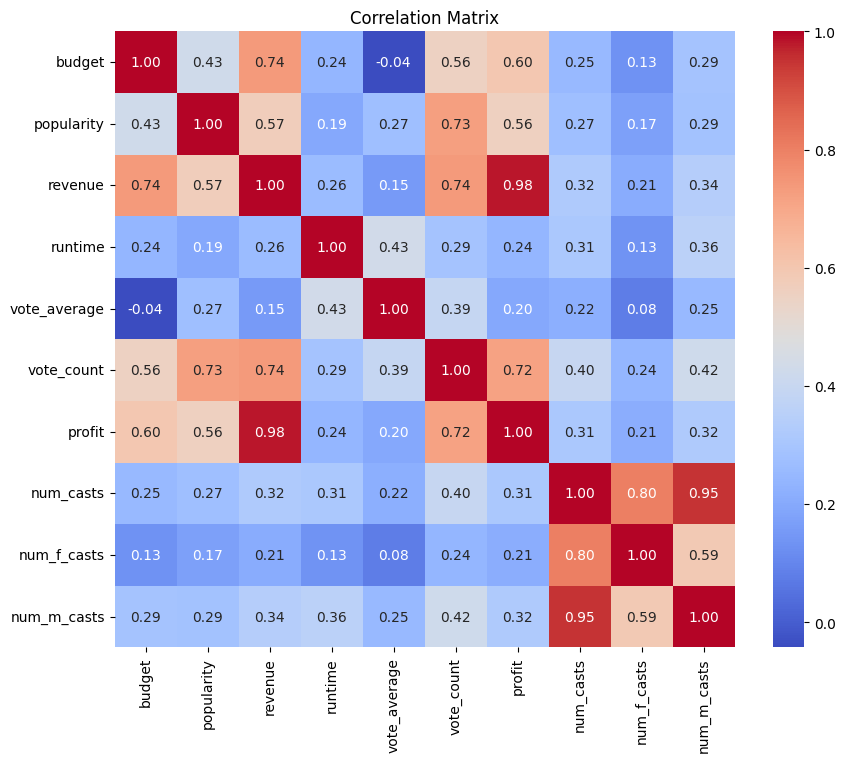

In [18]:
numerical_df = clean_df.select_dtypes(include='number')
numerical_df = numerical_df[(numerical_df > 0).all(axis=1)]
numerical_df = numerical_df[numerical_df['budget'] > 1e5]
numerical_df.drop('movie_id', axis=1, inplace=True)
numerical_df.reset_index(drop=True, inplace=True)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Number of crews

In [19]:
clean_df['num_crews'], clean_df['num_f_crews'], clean_df['num_m_crews'] = zip(*clean_df['crew'].apply(count_casts))

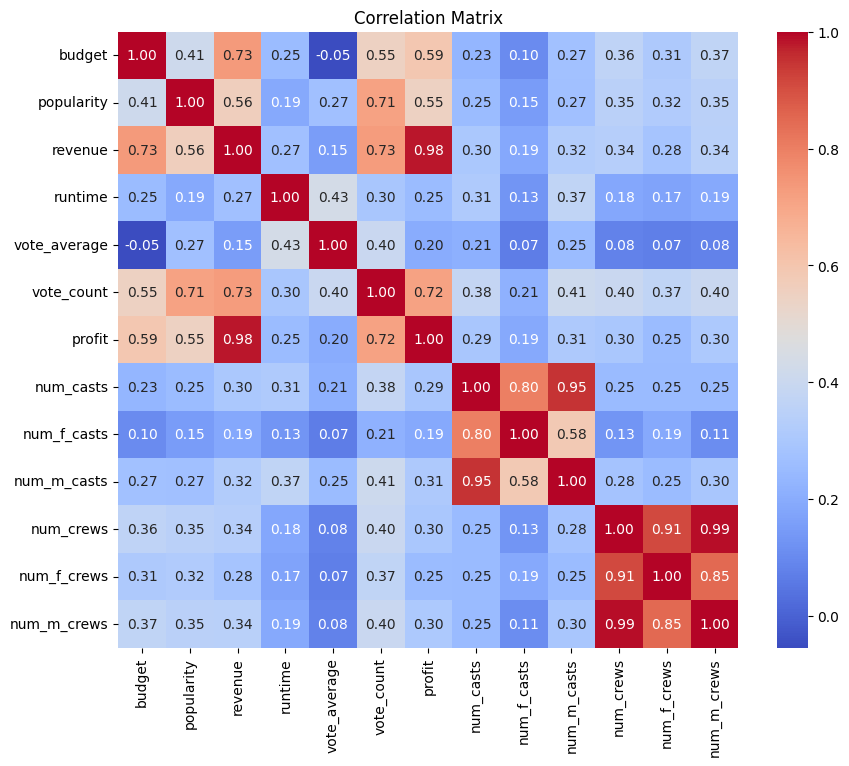

In [20]:
numerical_df = clean_df.select_dtypes(include='number')
numerical_df = numerical_df[(numerical_df > 0).all(axis=1)]
numerical_df = numerical_df[numerical_df['budget'] > 1e5]
numerical_df.drop('movie_id', axis=1, inplace=True)
numerical_df.reset_index(drop=True, inplace=True)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Cast

In [21]:
casts_info = dict()
pop_mean, pop_std = clean_df['popularity'].mean(), clean_df['popularity'].std()

for i in range(len(clean_df)):
    casts = eval(clean_df['cast'][i])
    popularity = (clean_df['popularity'][i] - pop_mean) / pop_std
    for cast in casts:
        if cast['name'] in casts_info.keys():
            casts_info[cast['name']] += popularity
        else:
            casts_info[cast['name']] = popularity

casts_info = dict(sorted(casts_info.items(), key=lambda x: x[1], reverse=True))
casts_info
# c_to_i = {crew: i for i, crew in enumerate(crews_info.keys())}
# crew_classes = list(c_to_i.keys())[:10] + ['Other']

{'Stan Lee': 65.13454621175522,
 'Geoffrey Rush': 38.796896832218046,
 'Ava Acres': 35.2010616432651,
 'Joseph Oliveira': 34.68490873802116,
 'Michael Caine': 32.31486900677727,
 'Steve Coogan': 30.46608074511792,
 'Steve Carell': 30.045918359282364,
 'Michael Keaton': 29.52486762313879,
 'Pierre Coffin': 28.491758240247226,
 'Matt Damon': 27.483665084018668,
 'Russ Fega': 27.226392514834856,
 'Orlando Bloom': 26.692013491871666,
 'Chris Pratt': 26.020432802677288,
 'Anne Hathaway': 25.41848973306496,
 'Andy Serkis': 25.082048610538497,
 'Johnny Depp': 24.732342411921312,
 'John Ratzenberger': 24.393910348379645,
 'Jessica Chastain': 23.89848137884332,
 'Paul Thornley': 23.745813114475126,
 'Jennifer Saunders': 23.689215262398374,
 'Cici Leah Campbell': 23.549205455792105,
 'Josh Stewart': 23.514595663239103,
 'Hiroyuki Sanada': 23.460335447954012,
 'Dave Rosenbaum': 23.22894592504284,
 'Alex Dowding': 23.22894592504284,
 'Kyle Balda': 23.22894592504284,
 'Zoe Saldana': 22.884007964080

       Number of Movies  proportion
15023                -6    0.000022
15018                -6    0.000022
15019                -6    0.000022
15022                -6    0.000022
15021                -6    0.000022


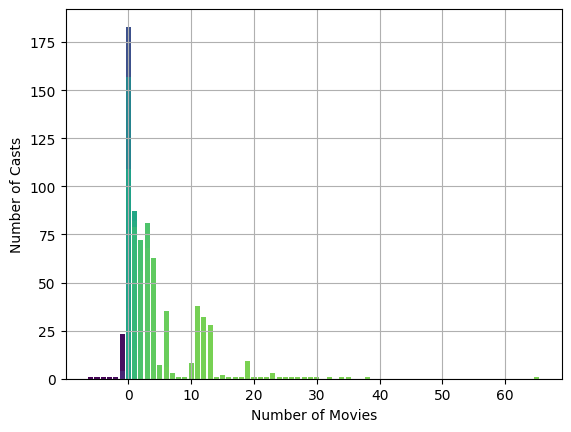

In [22]:
df = pd.DataFrame(casts_info.values(), columns=['Number of Movies'])

variable = 'Number of Movies'

statistics = df[variable].value_counts(normalize=False, sort=False).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].astype(int)
statistics = statistics.sort_values(by=variable)
statistics['proportion'] = statistics['count'] / statistics['count'].sum()
statistics['log_count'] = np.log(statistics['count'])  + 1

print(statistics[[variable, 'proportion']][:5])

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(0, 0.8, len(statistics)))
ax.bar(statistics[variable], statistics['count'], color=colors)
plt.grid()
plt.xlabel("Number of Movies")
plt.ylabel("Number of Casts")
plt.show()

In [23]:
def cast_to_value(casts):
    value = 0
    for c in casts:
        value += casts_info[c['name']]
    return value

clean_df['cast_value'] = clean_df['cast'].apply(lambda cs: cast_to_value(eval(cs)))

#### Crew

In [28]:
crews_info = dict()
pop_mean, pop_std = clean_df['popularity'].mean(), clean_df['popularity'].std()

for i in range(len(clean_df)):
    crews = eval(clean_df['crew'][i])
    popularity = (clean_df['popularity'][i] - pop_mean) / pop_std
    for crew in crews:
        if crew['name'] in crews_info.keys():
            crews_info[crew['name']] += popularity
        else:
            crews_info[crew['name']] = popularity

crews_info = dict(sorted(crews_info.items(), key=lambda x: x[1], reverse=True))
crews_info
c_to_i = {crew: i for i, crew in enumerate(crews_info.keys())}
crew_classes = list(c_to_i.keys())[:10] + ['Other']

       Number of Movies  proportion
20014                -9    0.000023
20013                -9    0.000023
20011                -8    0.000023
20010                -8    0.000023
20012                -8    0.000023


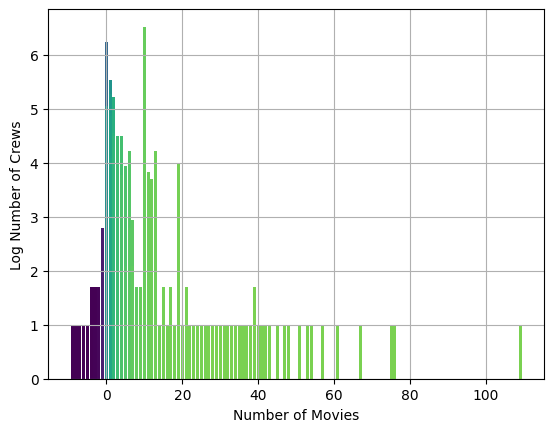

In [25]:
df = pd.DataFrame(crews_info.values(), columns=['Number of Movies'])

variable = 'Number of Movies'

statistics = df[variable].value_counts(normalize=False, sort=False).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].astype(int)
statistics = statistics.sort_values(by=variable)
statistics['proportion'] = statistics['count'] / statistics['count'].sum()
statistics['log_count'] = np.log(statistics['count'])  + 1

print(statistics[[variable, 'proportion']][:5])

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(0, 0.8, len(statistics)))
ax.bar(statistics[variable], statistics['log_count'], color=colors)
plt.grid()
plt.xlabel("Number of Movies")
plt.ylabel("Log Number of Crews")
plt.show()

In [26]:
def crew_to_value(crews):
    value = 0
    for c in crews:
        value += crews_info[c['name']]
    return value

clean_df['crew_value'] = clean_df['crew'].apply(lambda cs: crew_to_value(eval(cs)))

In [29]:
def crew_to_bin(crews, crew):
    for c in crews:
        if crew == 'Other':
            if c['name'] not in crew_classes:
                return 1
        else:
            if c['name'] == crew:
                return 1
    return 0

for crew in crew_classes:
    clean_df[crew] = clean_df['crew'].apply(lambda cs: crew_to_bin(eval(cs), crew))

#### Genre

In [30]:
genres_info = dict()
for i in range(len(clean_df)):
    genres = eval(clean_df['genres'][i])
    for genre in genres:
        if genre['name'] in genres_info.keys():
            genres_info[genre['name']] += 1
        else:
            genres_info[genre['name']] = 1

genres_info = dict(sorted(genres_info.items(), key=lambda x: x[1], reverse=True))
# genres_info
g_to_i = {genre: i for i, genre in enumerate(genres_info.keys())}
genre_classes = list(g_to_i.keys())[:10] + ['Other']
genre_classes

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Other']

In [31]:
def genre_to_bin(genres, genre):
    for g in genres:
        if genre == 'Other':
            if g['name'] not in genre_classes:
                return 1
        else:
            if g['name'] == genre:
                return 1
    return 0

for genre in genre_classes:
    clean_df[genre] = clean_df['genres'].apply(lambda gs: genre_to_bin(eval(gs), genre))

#### Production Companies

In [32]:
companies_info = dict()
for i in range(len(clean_df)):
    companies = eval(clean_df['production_companies'][i])
    for company in companies:
        if company['name'] in companies_info.keys():
            companies_info[company['name']] += 1
        else:
            companies_info[company['name']] = 1
companies_info = dict(sorted(companies_info.items(), key=lambda x: x[1], reverse=True))
c_to_i = {company: i for i, company in enumerate(companies_info.keys())}
# companies_info
company_classes = list(c_to_i.keys())[:10] + ['Other']
company_classes

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Relativity Media',
 'Walt Disney Pictures',
 'Touchstone Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'Other']

In [33]:
def compnay_to_bin(companies, company):
    for c in companies:
        if company == 'Other':
            if c['name'] not in company_classes:
                return 1
        else:
            if c['name'] == company:
                return 1
    return 0

for company in company_classes:
    clean_df[company] = clean_df['production_companies'].apply(lambda cs: compnay_to_bin(eval(cs), company))

#### Production Countries

In [34]:
countries_info = dict()
for i in range(len(clean_df)):
    countries = eval(clean_df['production_countries'][i])
    for country in countries:
        if country['name'] in countries_info.keys():
            countries_info[country['name']] += 1
        else:
            countries_info[country['name']] = 1
countries_info = dict(sorted(countries_info.items(), key=lambda x: x[1], reverse=True))
c_to_i = {country: i for i, country in enumerate(countries_info.keys())}
country_classes = list(c_to_i.keys())[:10] + ['Other']
country_classes

['United States of America',
 'United Kingdom',
 'Germany',
 'France',
 'Canada',
 'Australia',
 'Italy',
 'Spain',
 'Japan',
 'China',
 'Other']

In [35]:
def country_to_bin(countries, country):
    for c in countries:
        if country == 'Other':
            if c['name'] not in country_classes:
                return 1
        else:
            if c['name'] == country:
                return 1
    return 0

for country in country_classes:
    clean_df[country] = clean_df['production_countries'].apply(lambda cs: country_to_bin(eval(cs), country))

#### Keywords

In [36]:
keywords_info = dict()
for i in range(len(clean_df)):
    keywords = eval(clean_df['keywords'][i])
    for keyword in keywords:
        if keyword['name'] in keywords_info.keys():
            keywords_info[keyword['name']] += 1
        else:
            keywords_info[keyword['name']] = 1
keywords_info = dict(sorted(keywords_info.items(), key=lambda x: x[1], reverse=True))
k_to_i = {keyword: i for i, keyword in enumerate(keywords_info.keys())}
# keywords_info
keyword_classes = list(k_to_i.keys())[:20] + ['Other']
keyword_classes

['duringcreditsstinger',
 'based on novel',
 'woman director',
 'aftercreditsstinger',
 'murder',
 'dystopia',
 'violence',
 'independent film',
 '3d',
 'sequel',
 'revenge',
 'sport',
 'biography',
 'friendship',
 'los angeles',
 'teenager',
 'alien',
 'love',
 'musical',
 'police',
 'Other']

In [37]:
def keyword_to_bin(keywords, keyword):
    for k in keywords:
        if keyword == 'Other':
            if k['name'] not in keyword_classes:
                return 1
        else:
            if k['name'] == keyword:
                return 1
    return 0

for keyword in keyword_classes:
    clean_df[keyword] = clean_df['keywords'].apply(lambda ks: keyword_to_bin(eval(ks), keyword))

# Feature Engineering

### Import Modules

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from collections import Counter

### Select and Normalize Features, and Split Data

In [40]:
scaler = MinMaxScaler()

# Prepare the data for training
X = clean_df[
                ['budget', 'runtime', 'num_casts', 'num_crews', 'cast_value', 'crew_value']
                # + company_classes
                # + country_classes
                + genre_classes
                + keyword_classes
]

y = clean_df['profitable']  # Target variable

# X = SelectKBest(f_classif, k=2).fit_transform(X, y)
# X = PCA(n_components=2).fit_transform(X)

X_scaled = scaler.fit_transform(X)

### Split Data into Train and Test

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=0, stratify=y)

print("Class distribution in training set:")
print(Counter(y_train))

print("Class distribution in test set:")
print(Counter(y_test))

Class distribution in training set:
Counter({True: 1385, False: 1295})
Class distribution in test set:
Counter({True: 244, False: 229})


# Data Modeling and Evaluation

### Import Modules

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

### Logistic Regression

#### Train

In [45]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Accuracy on train data
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.701865671641791
Precision: 0.7209653092006033
Recall: 0.6902527075812275
F1-Score: 0.7052748063445223


#### Accuracy, Precision, Recall, F1

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.678646934460888
Precision: 0.6982758620689655
Recall: 0.6639344262295082
F1-Score: 0.680672268907563


#### ROC Curve

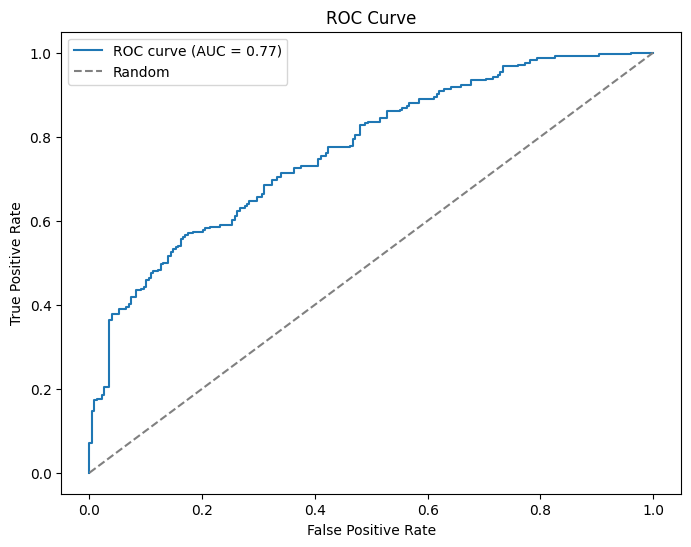

In [47]:
# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Decision Tree

#### Train

In [48]:
# Initialize and train the Decision treee model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Accuracy on train data
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


#### Accuracy, Precision, Recall, F1

In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.6617336152219874
Precision: 0.6707317073170732
Recall: 0.6762295081967213
F1-Score: 0.673469387755102


#### ROC Curve

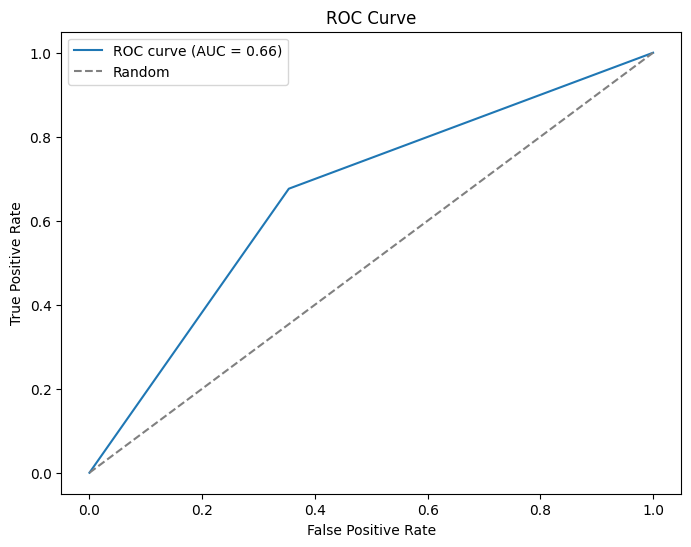

In [50]:
# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Random Forest

#### Train

In [51]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

# Accuracy on train data
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.6973880597014925
Precision: 0.68782722513089
Recall: 0.7588447653429603
F1-Score: 0.7215928595949194


#### Accuracy, Precision, Recall, F1

In [52]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7019027484143763
Precision: 0.6859205776173285
Recall: 0.7786885245901639
F1-Score: 0.7293666026871402


#### ROC Curve

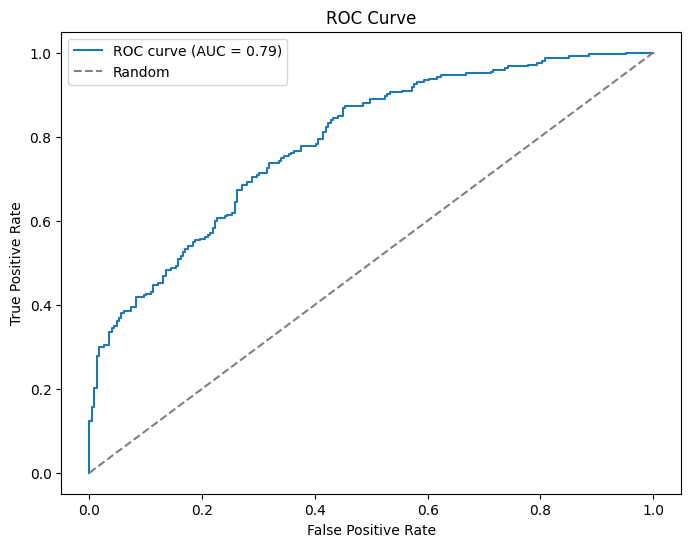

In [53]:
# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### GBoost

#### Train

In [54]:
# Initialize and train the GBoost model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)

# Accuracy on train data
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7466417910447761
Precision: 0.7489421720733427
Recall: 0.7667870036101083
F1-Score: 0.7577595433464146


#### Accuracy, Precision, Recall, F1

In [55]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.6976744186046512
Precision: 0.6934865900383141
Recall: 0.7418032786885246
F1-Score: 0.7168316831683168


#### ROC Curve

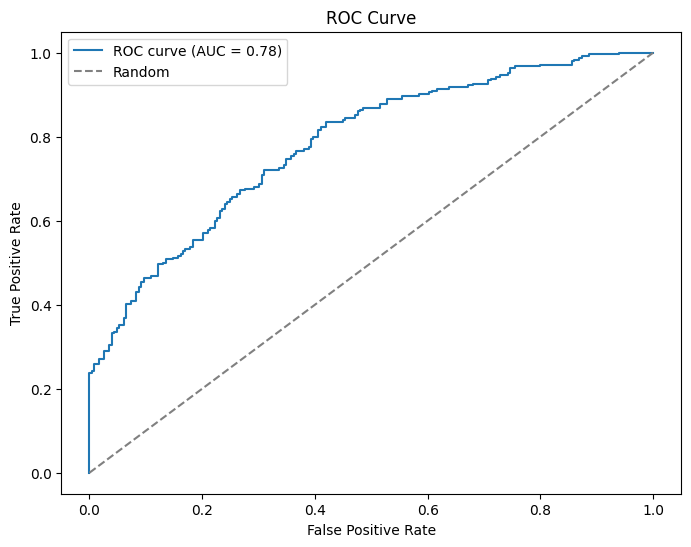

In [56]:
# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### XGBoost

#### Train

In [57]:
# Initialize and train the XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)

# Accuracy on train data
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7384328358208955
Precision: 0.7428977272727273
Recall: 0.7552346570397112
F1-Score: 0.749015395631937


#### Accuracy, Precision, Recall, F1

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7019027484143763
Precision: 0.6988416988416989
Recall: 0.7418032786885246
F1-Score: 0.7196819085487077


#### ROC Curve

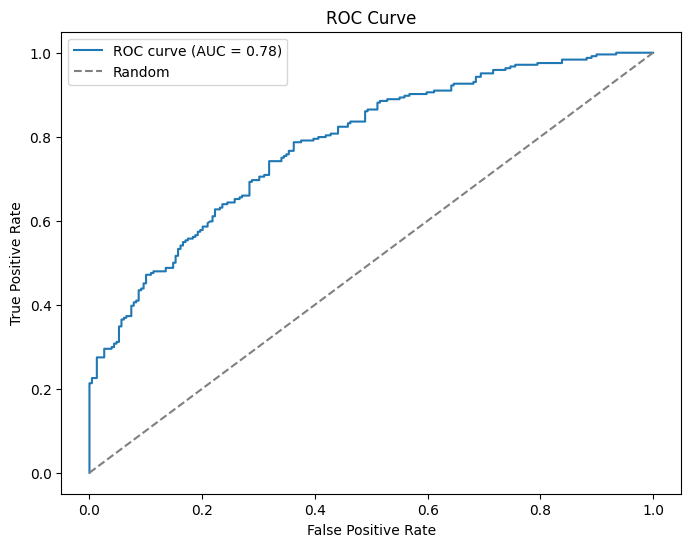

In [59]:
# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Recommender System

### Import Modules

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Recomender System

In [61]:
# Preprocessing: Handle missing values and concatenate relevant textual features
features = \
    clean_df['genres'].apply(lambda gs: ' - '.join([g['name'] for g in eval(gs)])) + \
    ' -- ' + clean_df['keywords'].apply(lambda ks: ' - '.join([k['name'] for k in eval(ks)])) \
    + ' -- ' + clean_df['overview'] + \
    ' -- ' + clean_df['cast'].apply(lambda cs: ' - '.join([c['name'] for c in eval(cs)]))

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the textual features to TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(features)

# Assuming 'selected_video_index' is the index of the selected video
selected_video_index = 20  # Example: First movie in the dataset

# Calculate cosine similarity between selected video and all other videos
cosine_similarities = cosine_similarity(tfidf_matrix[selected_video_index], tfidf_matrix).flatten()

# Sort the indices based on similarity scores (in descending order)
similar_movie_indices = cosine_similarities.argsort()[::-1]

# Exclude the selected video itself from recommendations
similar_movie_indices = similar_movie_indices[:]

# # Select top 5 most similar movies as recommendations
top_5_recommendations = clean_df.iloc[similar_movie_indices[:6]]

# # Display recommendations
top_5_recommendations[['title', 'genres', 'keywords', 'overview', 'vote_average', 'vote_count']]


,title,genres,keywords,overview,vote_average,vote_count
20,The Amazing Spider-Man,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1872, ""name"": ""loss of father""}, {""id""...",Peter Parker is an outcast high schooler aband...,6.5,6586
38,The Amazing Spider-Man 2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1523, ""name"": ""obsession""}, {""id"": 882...","For Peter Parker, life is busy. Between taking...",6.5,4179
1384,Arachnophobia,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...","[{""id"": 1415, ""name"": ""small town""}, {""id"": 97...",A large spider from the jungles of South Ameri...,6.2,433
157,Spider-Man,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",After being bitten by a genetically altered sp...,6.8,5265
5,Spider-Man 3,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",The seemingly invincible Spider-Man goes up ag...,5.9,3576
30,Spider-Man 2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",Peter Parker is going through a major identity...,6.7,4321


In [62]:
# Preprocessing: Handle missing values and concatenate relevant textual features
feature1 = clean_df['genres'].apply(lambda gs: ' - '.join([g['name'] for g in eval(gs)]))
feature2 = clean_df['keywords'].apply(lambda ks: ' - '.join([k['name'] for k in eval(ks)]))
feature3 = clean_df['overview']
feature4 = clean_df['cast'].apply(lambda cs: ' - '.join([c['name'] for c in eval(cs)]))

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the textual features to TF-IDF vectors
matrix1 = vectorizer.fit_transform(feature1)
matrix2 = vectorizer.fit_transform(feature2)
matrix3 = vectorizer.fit_transform(feature3)
matrix4 = vectorizer.fit_transform(feature4)

# Assuming 'selected_video_index' is the index of the selected video
selected_video_index = 20  # Example: First movie in the dataset

# Calculate cosine similarity between selected video and all other videos
sim1 = cosine_similarity(matrix1[selected_video_index], matrix1).flatten()
sim2 = cosine_similarity(matrix2[selected_video_index], matrix2).flatten()
sim3 = cosine_similarity(matrix3[selected_video_index], matrix3).flatten()
sim4 = cosine_similarity(matrix4[selected_video_index], matrix4).flatten()

cosine_similarities = (sim1 + sim2 + sim3 + sim4) / 4

# Sort the indices based on similarity scores (in descending order)
similar_movie_indices = cosine_similarities.argsort()[::-1]

# Exclude the selected video itself from recommendations
similar_movie_indices = similar_movie_indices[:]

# # Select top 5 most similar movies as recommendations
top_5_recommendations = clean_df.iloc[similar_movie_indices[:6]]

# # Display recommendations
top_5_recommendations[['title', 'genres', 'keywords', 'overview', 'vote_average', 'vote_count']]


,title,genres,keywords,overview,vote_average,vote_count
20,The Amazing Spider-Man,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1872, ""name"": ""loss of father""}, {""id""...",Peter Parker is an outcast high schooler aband...,6.5,6586
38,The Amazing Spider-Man 2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1523, ""name"": ""obsession""}, {""id"": 882...","For Peter Parker, life is busy. Between taking...",6.5,4179
5,Spider-Man 3,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",The seemingly invincible Spider-Man goes up ag...,5.9,3576
30,Spider-Man 2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",Peter Parker is going through a major identity...,6.7,4321
157,Spider-Man,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",After being bitten by a genetically altered sp...,6.8,5265
9,Batman v Superman: Dawn of Justice,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",Fearing the actions of a god-like Super Hero l...,5.7,7004


#### Feature Comparison

In [63]:
print('genres:\n')
print(feature1[20])
print('')
print(feature1[38])
print('\nkeywords:\n')
print(feature2[20])
print('')
print(feature2[38])
print('\noverview:\n')
print(feature3[20])
print('')
print(feature3[38])

genres:

Action - Adventure - Fantasy

Action - Adventure - Fantasy

keywords:

loss of father - vigilante - serum - marvel comic - scientific experiment - spider bite - masked vigilante - reboot - super powers - genetic engineering - social outcast - duringcreditsstinger

obsession - marvel comic - sequel - based on comic book - electrocution - medical experiment - electricity - super powers

overview:

Peter Parker is an outcast high schooler abandoned by his parents as a boy, leaving him to be raised by his Uncle Ben and Aunt May. Like most teenagers, Peter is trying to figure out who he is and how he got to be the person he is today. As Peter discovers a mysterious briefcase that belonged to his father, he begins a quest to understand his parents' disappearance – leading him directly to Oscorp and the lab of Dr. Curt Connors, his father's former partner. As Spider-Man is set on a collision course with Connors' alter ego, The Lizard, Peter will make life-altering choices to use his 